# Data Visualization exercise

In [1]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [3]:
### Using .head() and .tail() to see data content
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [4]:
### .info() to provide information on the data

euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [5]:
### What to do with '-' values?
## Change "-" into NAs

euk.replace("-", pd.NA, inplace=True)
print(euk.head())

                      Species   Kingdom           Class  Size (Mb)      GC%  \
0  Emiliania huxleyi CCMP1516  Protists  Other Protists    167.676     64.5   
1        Arabidopsis thaliana    Plants     Land Plants    119.669  36.0529   
2                 Glycine max    Plants     Land Plants    979.046  35.1153   
3         Medicago truncatula    Plants     Land Plants    412.924   34.047   
4        Solanum lycopersicum    Plants     Land Plants    828.349  35.6991   

  Number of genes Number of proteins  Publication year Assembly status  
0           38549              38554              2013        Scaffold  
1           38311              48265              2001      Chromosome  
2           59847              71219              2010      Chromosome  
3           37603              41939              2011      Chromosome  
4           31200              37660              2010      Chromosome  


## Visualize the relationship between two variables

Can you see the relationship between genome size and the number of genes?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [8]:
## Look only look at reptile data using class 'Reptiles'

## First "euk" tells Python we wish to create a new dataframe from euk called reptiles

## Second "euk" creates a Boolean mask to filter the rows, checks "Class" column of euk and returns only those that == "Reptiles"

reptiles = euk[euk["Class"]=="Reptiles"]
print(reptiles)


                           Species  Kingdom     Class  Size (Mb)      GC%  \
282            Anolis carolinensis  Animals  Reptiles    1799.14  40.8238   
543            Sphenodon punctatus  Animals  Reptiles    4272.21     <NA>   
565               Pogona vitticeps  Animals  Reptiles    1716.68     42.1   
589      Platysternon megacephalum  Animals  Reptiles    2319.09     43.9   
612               Podarcis muralis  Animals  Reptiles    1511.00  44.2057   
650              Cuora amboinensis  Animals  Reptiles    2214.83     43.9   
730             Ophiophagus hannah  Animals  Reptiles    1594.07     40.6   
944         Chrysemys picta bellii  Animals  Reptiles    2365.77   44.564   
1122                Chelonia mydas  Animals  Reptiles    2208.41     43.7   
1136    Alligator mississippiensis  Animals  Reptiles    2161.73     44.4   
1150            Crocodylus porosus  Animals  Reptiles    2049.54     44.2   
1218             Notechis scutatus  Animals  Reptiles    1665.53     40.2   

In [10]:
## Pick out data for just Reptiles with genome size < 4000

small_genome_reptiles = reptiles[reptiles["Size (Mb)"] < 4000]
small_genome_reptiles

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
282,Anolis carolinensis,Animals,Reptiles,1799.14,40.8238,22092,34827,2007,Chromosome
565,Pogona vitticeps,Animals,Reptiles,1716.68,42.1,21445,38203,2015,Scaffold
589,Platysternon megacephalum,Animals,Reptiles,2319.09,43.9,<NA>,<NA>,2018,Scaffold
612,Podarcis muralis,Animals,Reptiles,1511.00,44.2057,<NA>,<NA>,2019,Chromosome
650,Cuora amboinensis,Animals,Reptiles,2214.83,43.9,<NA>,<NA>,2019,Scaffold
730,Ophiophagus hannah,Animals,Reptiles,1594.07,40.6,<NA>,<NA>,2013,Scaffold
944,Chrysemys picta bellii,Animals,Reptiles,2365.77,44.564,25289,46651,2012,Chromosome
1122,Chelonia mydas,Animals,Reptiles,2208.41,43.7,22336,28672,2013,Scaffold
1136,Alligator mississippiensis,Animals,Reptiles,2161.73,44.4,25012,42388,2012,Scaffold
1150,Crocodylus porosus,Animals,Reptiles,2049.54,44.2,19551,28676,2016,Scaffold


### Use `relplot` to look at relationships
We will use the `relplot` function, and the names of the columns that we want on the `X` and `Y` axes to look at the relationship between genome size and number of genes in Reptiles

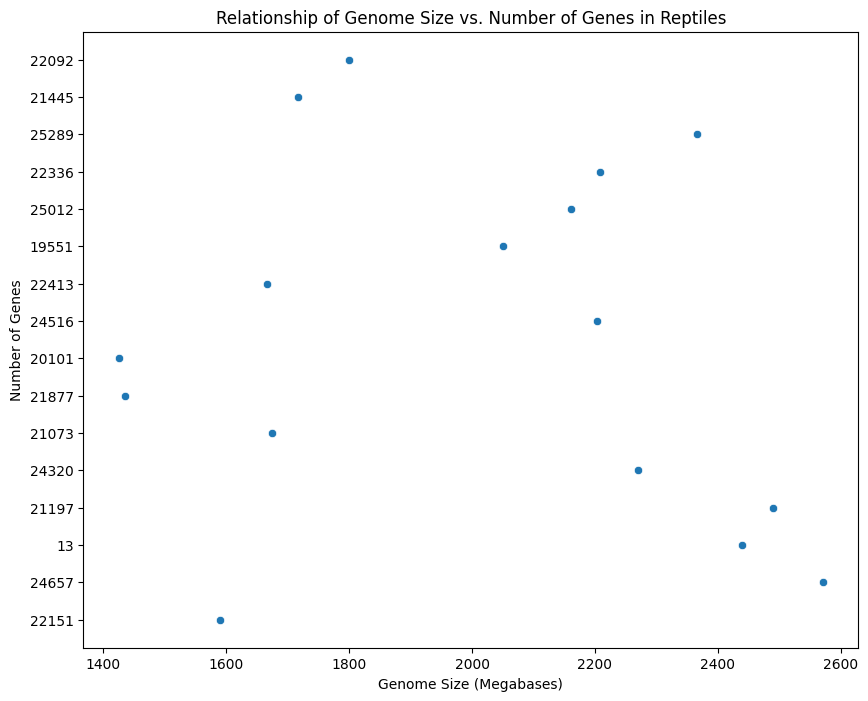

In [24]:
### Relationship plot between genome size and number of genes in Retiles

plt.figure(figsize=(10,8))
sns.scatterplot(data=small_genome_reptiles, x="Size (Mb)", y="Number of genes")

plt.xlabel("Genome Size (Megabases)")
plt.ylabel("Number of Genes")
plt.title("Relationship of Genome Size vs. Number of Genes in Reptiles")

plt.show()

### Can you create a new column to look at gene density?
gene density = Number of genes / Size (Mb)

In [17]:
# gene density = Number of genes / Size (Mb)
# create the new column

## Must convert the object dtype "Number of genes" to a numerical value to divide
## to_numeric is a pd standalone function, not a method of a dataframe

euk["Number of genes"] = pd.to_numeric(euk["Number of genes"])


genome_size_mb = euk["Size (Mb)"]
number_genes = euk["Number of genes"]

euk["Gene Density"] = number_genes / genome_size_mb
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Gene Density
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549.0,38554,2013,Scaffold,229.901715
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311.0,48265,2001,Chromosome,320.141390
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847.0,71219,2010,Chromosome,61.127873
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603.0,41939,2011,Chromosome,91.065184
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200.0,37660,2010,Chromosome,37.665284


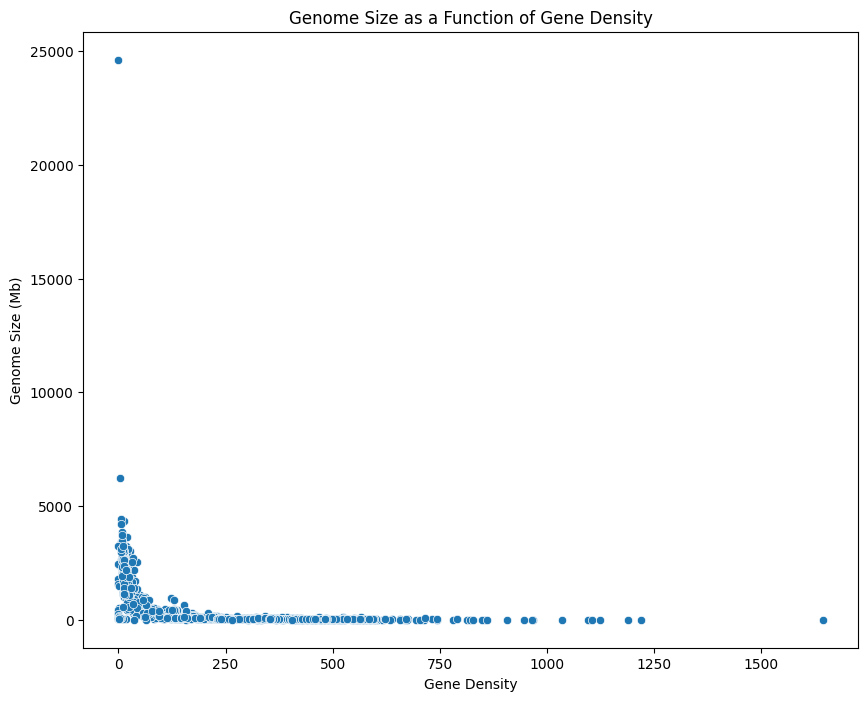

In [24]:
### Create the plot that represents the relation between Size (Mb) and density
# Is it what you expected?

## Larger genomes tend to contain more non-coding DNA, so this trend is expected.
## There is a negative correlation between genome size and gene density, so as size increases, density decreases

plt.figure(figsize=(10,8))
sns.scatterplot(data=euk, x="Gene Density", y="Size (Mb)")

plt.xlabel("Gene Density")
plt.ylabel("Genome Size (Mb)")
plt.title("Genome Size as a Function of Gene Density")

plt.show()


## Seaborn
These are other `kind` plots that we did not try in lectures. Look up seaborn documentation and try to create these new plots.

1.   Create a violin plot for genome size distribution against Class Land Plants.
2.   Create a scatter plot showing the relationship between Kingdom and Publication year
3. Create a bar plot for GC% for each Kingdom

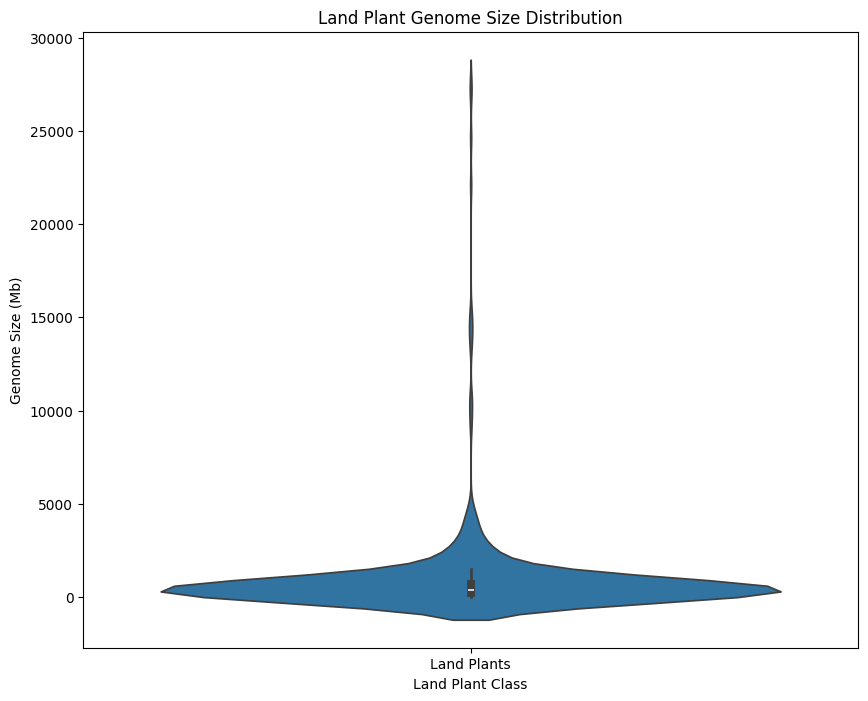

In [32]:
### Your code - Create a violin plot for genome size distribution against Class Land Plants.

## Wider sections of the violin plot indicate where genome sizes are most concentrated

## High width toward the bottom indicates that most land plants have small genomes

## Width indicates density of data points

## Black area in the center of the plot shows key distribution metrics including IQR, outliers, and median

plt.figure(figsize=(10,8))

land_plants = euk[euk["Class"] == "Land Plants"]

sns.violinplot(data=land_plants, x="Class", y="Size (Mb)")

plt.xlabel("Land Plant Class")
plt.ylabel("Genome Size (Mb)")
plt.title("Land Plant Genome Size Distribution")

plt.show()


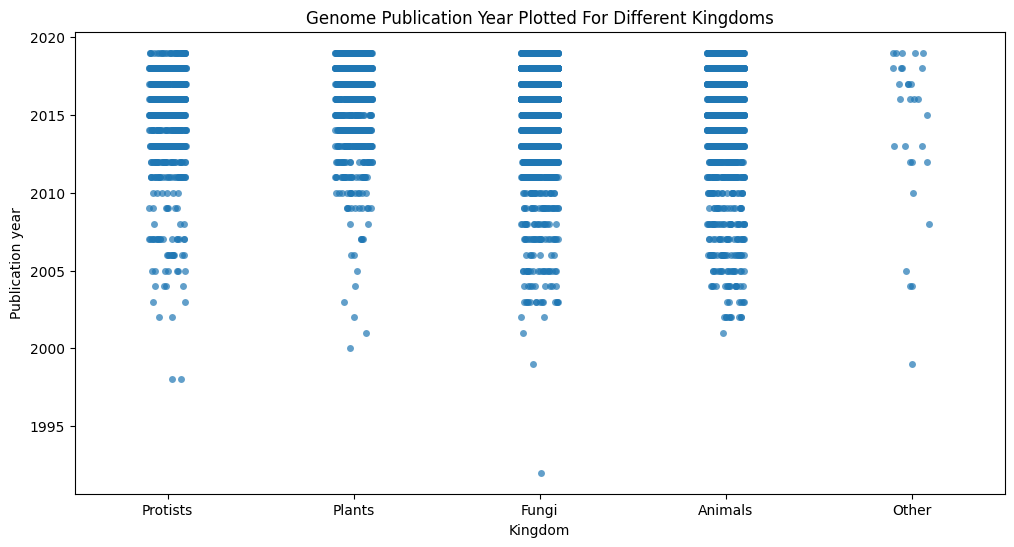

In [35]:
### Your code - Create a scatter plot showing the relationship between Kingdom and Publication year

## Not sure if this is correct, ask at office hours ** 

## Since kingdom is a categorical variable, we use jitter to create space between data points for a scatter plot

plt.figure(figsize=(12,6))
sns.stripplot(data=euk, x="Kingdom", y="Publication year", jitter=True, alpha=0.7)
plt.title("Genome Publication Year Plotted For Different Kingdoms")
plt.show()

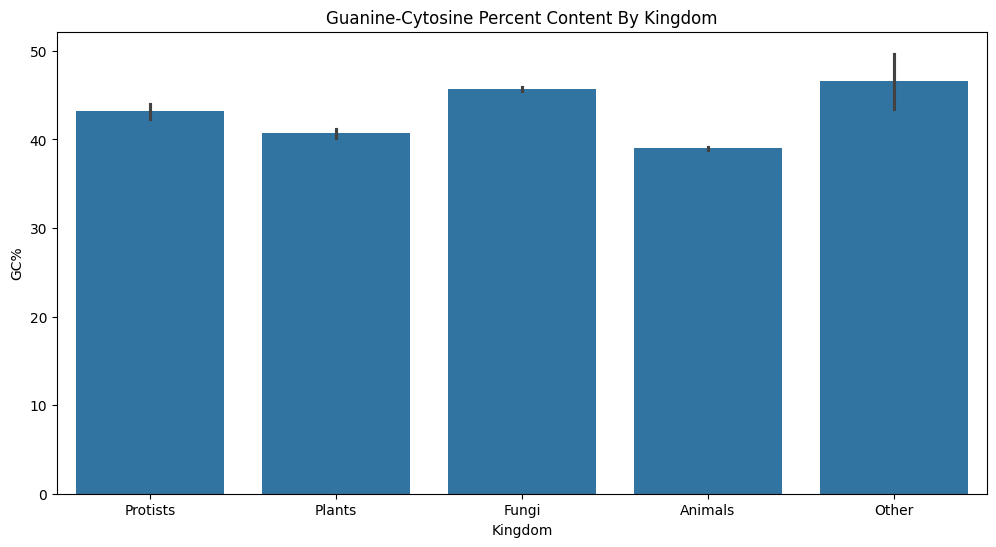

In [ ]:
### Your code - Create a bar plot for GC% for each Kingdom

# Again, GC% is stored as an object, indicating that the numerical values are strings, convert to numeric using pandas standalone function to_numeric

euk["GC%"] = pd.to_numeric(euk["GC%"])

plt.figure(figsize=(12,6))
sns.barplot(data=euk, x="Kingdom", y="GC%")
plt.title("Guanine-Cytosine Percent Content By Kingdom")

plt.show()